In [2]:
# %matplotlib inline
import IPython
from os import path
from pydub import AudioSegment
import random
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pydub
import IPython.display as ipd
import librosa.display
from os import walk
from IPython import display
import speech_recognition as sr
import os
from os import walk
from pydub import AudioSegment
import warnings
warnings.filterwarnings("ignore")
# import soundfile
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython.display import Image
# Set the seed value forapt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2 experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
r = sr.Recognizer()

In [3]:
file = 'glass.wav'

In [4]:
sample,sample_rate = librosa.load(file)

In [5]:
sample.shape, sample_rate 

((95995,), 22050)

In [6]:
IPython.display.display(IPython.display.Audio(sample, rate=sample_rate))

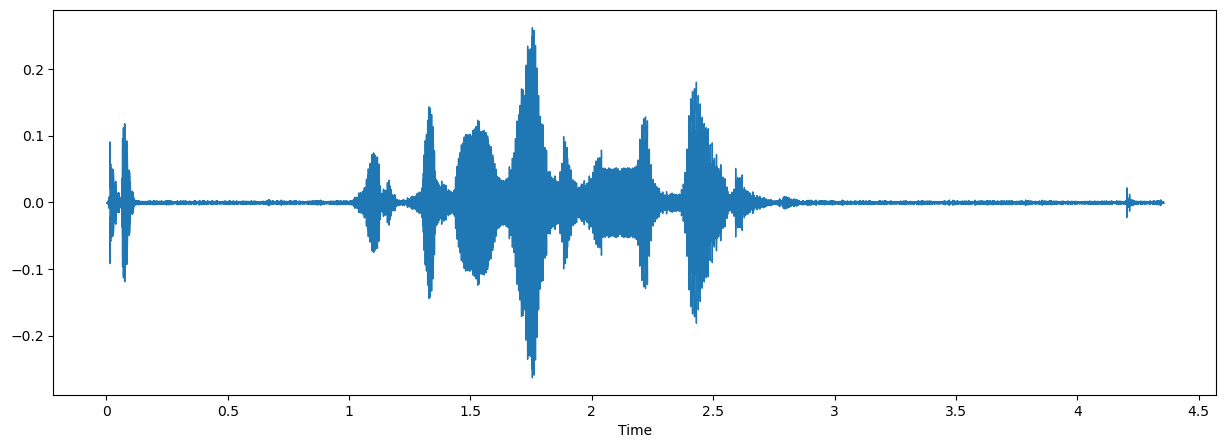

In [7]:
fig , axes = plt.subplots(figsize=(15,5))
librosa.display.waveshow(sample,sr=sample_rate)

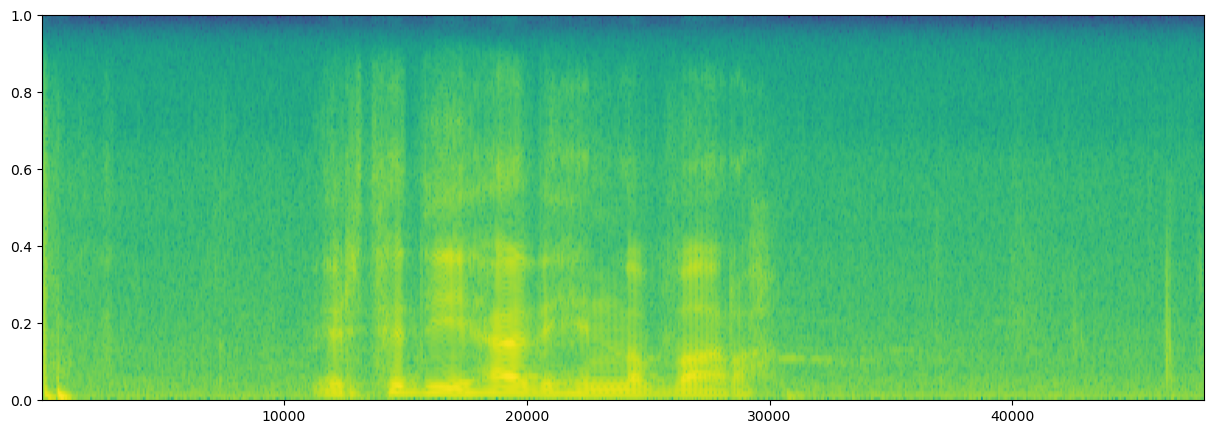

In [8]:
fig , axes = plt.subplots(figsize=(15,5))
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(sample) 

In [9]:
with sr.AudioFile(file) as source:
    # listen for the data (load audio to memory)
    audio_data = r.record(source)
    # recognize (convert from speech to text)
    text = r.recognize_google(audio_data, language="ar")
    print(text)

ارتدي هذه النظاره


In [10]:
# Image(filename='giphy.gif') 

In [11]:
text

'ارتدي هذه النظاره'

In [13]:
img = None
if 'النظاره' in text:
    img = Image(filename='giphy.gif')
    print(img)
# img

In [1]:
from pil import Image

ModuleNotFoundError: No module named 'pil'

In [ ]:
img = Image(filename='sugar.gif')

In [ ]:
Sr_file = 'هل تشعر بصداع يا أحمد'

In [ ]:
img = None
if 'تشعر' in Sr_file and 'صداع' in Sr_file:
    img = Image(filename='sugar.gif')
# img

In [3]:
train_df = pd.read_csv("train.csv")

In [4]:
train_df

,text,target
0,الى اين تتجه هذه العلامه وهذه وهذه,direction
1,هل لديك مرض السكري او اي مرض,Sugar
2,الى اين تتجه هذه العلامه وهذه وهذه وهذه,direction
3,ارتدي هذه النظاره,glasses
4,اذهب الى اشعه وعمل صوره اشعه للعينين,ray
...,...,...
372,هل اصابك شيء في ما مثل زاد نحشره او ضربه عصا ن...,bug-pit
373,الى اين تتجه هذه العلامه وهذه وهذه وهذه,direction
374,حسنا يجلسون فضغط وضع راقصه على هذا الجهاز,Sit-down
375,هل اصابك شيء فيها مثل لسعه حشره او ضربه عصا او...,bug-pit


In [5]:
# How many examples of each class?
train_df['target'].value_counts()

Sit-down     56
direction    55
bug-pit      55
ray          54
headache     53
Sugar        52
glasses      52
Name: target, dtype: int64

In [6]:
train_df["target"]

0      direction
1          Sugar
2      direction
3        glasses
4            ray
         ...    
372      bug-pit
373    direction
374     Sit-down
375      bug-pit
376      bug-pit
Name: target, Length: 377, dtype: object

In [7]:
from sklearn import preprocessing

In [8]:
le = preprocessing.LabelEncoder()

In [9]:
le.fit(train_df['target'])

LabelEncoder()

In [10]:
train_df['target'] = le.transform(train_df['target'])

In [11]:
train_df

,text,target
0,الى اين تتجه هذه العلامه وهذه وهذه,3
1,هل لديك مرض السكري او اي مرض,1
2,الى اين تتجه هذه العلامه وهذه وهذه وهذه,3
3,ارتدي هذه النظاره,4
4,اذهب الى اشعه وعمل صوره اشعه للعينين,6
...,...,...
372,هل اصابك شيء في ما مثل زاد نحشره او ضربه عصا ن...,2
373,الى اين تتجه هذه العلامه وهذه وهذه وهذه,3
374,حسنا يجلسون فضغط وضع راقصه على هذا الجهاز,0
375,هل اصابك شيء فيها مثل لسعه حشره او ضربه عصا او...,2


In [12]:
train_df.target.value_counts()

0    56
3    55
2    55
6    54
5    53
1    52
4    52
Name: target, dtype: int64

In [13]:
train_df.to_csv('train_df_shuffled.csv',index=False)

In [14]:
train_df_shuffled = pd.read_csv("train_df_shuffled.csv")

In [15]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [16]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(339, 339, 38, 38)

In [17]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['اصابه شيء فيها مثل لذعه حشره او ضربه عصا او نحو ذلك',
        'الى اين تتجه هذه العلامه وهذه وهذه وهذه', 'هل تشعر بالصداع',
        'هل لديك مرض السكري او اي مرض مزمن',
        'هل اصابك شيء فيها مثلثات حشره او ضربتها او نحو ذلك',
        'اذهب الى الاشعه وعمل صوره اشعه للعينين',
        'اشعار واعمل صوره اشعه للعينين', 'هل تجارب صداع',
        'يا اين تتجه هذه العلامه وهذه وهذه وهذه',
        'هل اصابك شيء فيها مثل الازعاج حشره او ضربه عصا او نحو ذلك'],
       dtype=object),
 array([2, 3, 5, 1, 2, 6, 6, 5, 3, 2], dtype=int64))

## Converting text into numbers

Wonderful! We've got a training set and a validation set containing Tweets and labels.

Our labels are in numerical form (`0` to `6` ) but our Tweets are in string form.

> 🤔 **Question:** What do you think we have to do before we can use a machine learning algorithm with our text data? 

If you answered something along the lines of "turn it into numbers", you're correct. A machine learning algorithm requires its inputs to be in numerical form.

In NLP, there are two main concepts for turning text into numbers:
* **Tokenization** - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:
  1. Using **مرحبا يا علي** with the sentence "مرحبا يا علي " might result in "مرحبا" being `0`, "يا" being `1` and "علي" being `2`. In this case, every word in a sequence considered a single **token**.
  2. **Character-level tokenization**, such as converting the letters A-Z to values `1-26`. In this case, every character in a sequence considered a single **token**.
  3. **Sub-word tokenization** is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple **tokens**.
* **Embeddings** - An embedding is a representation of natural language which can be learned. Representation comes in the form of a **feature vector**. For example, the word "dance" could be represented by the 5-dimensional vector `[-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]`. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings: 
  1. **Create your own embedding** - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as [`tf.keras.layers.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)) and an embedding representation will be learned during model training.
  2. **Reuse a pre-learned embedding** - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-tokenization-vs-embedding.png)
*Example of **tokenization** (straight mapping from word to number) and **embedding** (richer representation of relationships between tokens).*

> 🤔 **Question:** What level of tokenzation should I use? What embedding should should I choose?

It depends on your problem. You could try character-level tokenization/embeddings and word-level tokenization/embeddings and see which perform best. You might even want to try stacking them (e.g. combining the outputs of your embedding layers using [`tf.keras.layers.concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/concatenate)). 

If you're looking for pre-trained word embeddings, [Word2vec embeddings](http://jalammar.github.io/illustrated-word2vec/), [GloVe embeddings](https://nlp.stanford.edu/projects/glove/) and many of the options available on [TensorFlow Hub](https://tfhub.dev/s?module-type=text-embedding) are great places to start.

> 🔑 **Note:** Much like searching for a pre-trained computer vision model, you can search for pre-trained word embeddings to use for your problem. Try searching for something like "use pre-trained word embeddings in TensorFlow".

In [18]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [19]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

7

In [20]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 7 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [21]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [22]:
# Create sample sentence and tokenize it
sample_sentence = "هل تشعر بصداع يا علي"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 7), dtype=int64, numpy=array([[ 3, 20, 45, 70,  1,  0,  0]], dtype=int64)>

In [23]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
هل تشعر بالصداع      

Vectorized version:


<tf.Tensor: shape=(1, 7), dtype=int64, numpy=array([[ 3, 20, 40,  0,  0,  0,  0]], dtype=int64)>

In [24]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 208
Top 5 most common words: ['', '[UNK]', 'او', 'هل', 'وهذه']
Bottom 5 least common words: ['اتعبتني', 'اتجاه', 'ابوك', '19', '1000']


In [25]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [26]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
هل اصاب كل شيء فيها مثل اللاسعات حشره او ضربه عصا او نحو ذلك      

Embedded version:


<tf.Tensor: shape=(1, 7, 128), dtype=float32, numpy=
array([[[-0.04284013, -0.01489798, -0.0159496 , -0.0226305 ,
          0.04298959, -0.04682324, -0.0026353 ,  0.01123267,
         -0.03430966, -0.00190909,  0.02867594,  0.0297017 ,
          0.02498296,  0.00814937,  0.04493314,  0.04413916,
         -0.00577633,  0.03141482,  0.00966071, -0.04037346,
          0.03765199, -0.01732815, -0.02747819, -0.02993454,
         -0.02981216,  0.0308927 , -0.02260027, -0.00124929,
          0.01732543, -0.02180376, -0.03130232, -0.04009864,
          0.03664006, -0.01028627, -0.03222132,  0.00378202,
         -0.02535181, -0.00505129,  0.02522682, -0.01333591,
          0.0391151 , -0.00091956,  0.02860123, -0.04375963,
          0.01296742,  0.0263852 , -0.04896233, -0.04747603,
          0.04653648,  0.01485529, -0.04613405,  0.00209745,
         -0.00271541,  0.03082445,  0.04200928, -0.04887832,
         -0.04972835, -0.0254328 ,  0.03892423, -0.02046248,
         -0.0439718 , -0.0345499

In [27]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.04284013, -0.01489798, -0.0159496 , -0.0226305 ,  0.04298959,
       -0.04682324, -0.0026353 ,  0.01123267, -0.03430966, -0.00190909,
        0.02867594,  0.0297017 ,  0.02498296,  0.00814937,  0.04493314,
        0.04413916, -0.00577633,  0.03141482,  0.00966071, -0.04037346,
        0.03765199, -0.01732815, -0.02747819, -0.02993454, -0.02981216,
        0.0308927 , -0.02260027, -0.00124929,  0.01732543, -0.02180376,
       -0.03130232, -0.04009864,  0.03664006, -0.01028627, -0.03222132,
        0.00378202, -0.02535181, -0.00505129,  0.02522682, -0.01333591,
        0.0391151 , -0.00091956,  0.02860123, -0.04375963,  0.01296742,
        0.0263852 , -0.04896233, -0.04747603,  0.04653648,  0.01485529,
       -0.04613405,  0.00209745, -0.00271541,  0.03082445,  0.04200928,
       -0.04887832, -0.04972835, -0.0254328 ,  0.03892423, -0.02046248,
       -0.0439718 , -0.0345499 , -0.0287706 ,  0.03040506,  0.03975679,
        0.020090

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [29]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 100.00%


In [30]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([0, 2, 3, 3, 3, 4, 4, 1, 3, 3, 4, 1, 6, 6, 1, 5, 0, 6, 0, 0],
      dtype=int64)

In [31]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [32]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 100.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

In [1]:
model_0.predict(['هل تشعر بصداع'])

NameError: name 'model_0' is not defined

In [103]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 100.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

In [35]:
model_0.predict(['إذهب وأعمل صورة أشعة للعينين'])

array([6], dtype=int64)

In [36]:
# Save TF Hub Sentence Encoder model to HDF5 format
# model_0.save("model.h5")

AttributeError: 'Pipeline' object has no attribute 'save'

In [37]:
import joblib

In [39]:
joblib.dump(model_0, 'model.pkl')

['model.pkl']

In [105]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [301]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(7, activation="softmax")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [309]:
# Compile model
model_1.compile(
#     loss="binary_crossentropy",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [310]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 7)                0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 7, 128)            1280000   
                                                                 
 global_average_pooling1d_19  (None, 128)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_33 (Dense)            (None, 7)                 903       
                                                                 
Total params: 1,280,903
Trainable params: 1,280,903
N

In [311]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20221210-112313
Epoch 1/10
11/11 [==============================] - 2s 70ms/step - loss: nan - accuracy: 0.1445 - val_loss: nan - val_accuracy: 0.1842
Epoch 2/10
11/11 [==============================] - 0s 29ms/step - loss: nan - accuracy: 0.1445 - val_loss: nan - val_accuracy: 0.1842
Epoch 3/10
11/11 [==============================] - 0s 29ms/step - loss: nan - accuracy: 0.1445 - val_loss: nan - val_accuracy: 0.1842
Epoch 4/10
11/11 [==============================] - 0s 26ms/step - loss: nan - accuracy: 0.1445 - val_loss: nan - val_accuracy: 0.1842
Epoch 5/10
11/11 [==============================] - 0s 30ms/step - loss: nan - accuracy: 0.1445 - val_loss: nan - val_accuracy: 0.1842
Epoch 6/10
11/11 [==============================] - 0s 27ms/step - loss: nan - accuracy: 0.1445 - val_loss: nan - val_accuracy: 0.1842
Epoch 7/10
11/11 [==============================] - 0s 27ms/step - loss: nan - accuracy: 0.1445 - val_loss: nan

In [ ]:
model_1.predict(['إرتدي هيبش النظارة'])

In [164]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

2/2 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1842


[nan, 0.18421052396297455]

In [139]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.1706062 , -0.0392484 , -0.12894358, ..., -0.06592436,
         -0.04854114, -0.17885564],
        [ 0.03977952, -0.03782602, -0.03646283, ...,  0.00236253,
          0.03332629,  0.02803668],
        [ 0.14636683,  0.00992476, -0.10696604, ..., -0.0657395 ,
         -0.09575013, -0.17625365],
        ...,
        [-0.03301444, -0.0052493 , -0.04209725, ...,  0.02028764,
          0.00308807,  0.02215792],
        [ 0.04933501,  0.01553482,  0.01593169, ..., -0.01781169,
          0.02554074, -0.00167966],
        [ 0.03103676, -0.00607105, -0.01014895, ...,  0.04555799,
         -0.02234115, -0.04768636]], dtype=float32)>]

In [120]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [121]:
model_1.predict(['إرتدي هيبش النظارة'])

1/1 [==============================] - 0s 172ms/step


array([[0.84325683]], dtype=float32)

## Recurrent Neural Networks (RNN's)¶

In [182]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="relu")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 7, 128)
(None, 64)


In [183]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [184]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 7)                0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 7, 128)            1280000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [185]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20221210-102620
Epoch 1/5
11/11 [==============================] - 8s 157ms/step - loss: 8.9996 - accuracy: 0.1445 - val_loss: 4.8021 - val_accuracy: 0.1842
Epoch 2/5
11/11 [==============================] - 0s 32ms/step - loss: 3.9975 - accuracy: 0.1445 - val_loss: 3.0650 - val_accuracy: 0.1842
Epoch 3/5
11/11 [==============================] - 0s 33ms/step - loss: 2.0115 - accuracy: 0.1445 - val_loss: 1.1514 - val_accuracy: 0.1842
Epoch 4/5
11/11 [==============================] - 0s 34ms/step - loss: -6.7680 - accuracy: 0.2389 - val_loss: -16.2490 - val_accuracy: 0.3158
Epoch 5/5
11/11 [==============================] - 0s 31ms/step - loss: -31.1945 - accuracy: 0.2832 - val_loss: -28.8933 - val_accuracy: 0.3158


In [191]:
model_2.predict(['الى اين تتجه هذه العلامه وهذه وهذه'])

1/1 [==============================] - 0s 47ms/step


array([[3.2197654]], dtype=float32)

### Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

> 📖 **Resource:** A full explanation of the GRU cell is beyond the scope of this noteook but I'd suggest the following resources to learn more:
* [Gated Recurrent Unit](https://en.wikipedia.org/wiki/Gated_recurrent_unit) Wikipedia page
* [Understanding GRU networks](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be) by Simeon Kostadinov

To use the GRU cell in TensorFlow, we can call the [`tensorflow.keras.layers.GRU()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU) class.

The architecture of the GRU-powered model will follow the same structure we've been using:

```
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
```

Again, the only difference will be the layer(s) we use between the embedding and the output.

In [251]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 
x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="relu")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [252]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [253]:
# Get a summary of the GRU model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 7)                0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 7, 128)            1280000   
                                                                 
 gru_10 (GRU)                (None, 64)                37248     
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 1)                 65        
                                                       

Notice the difference in number of trainable parameters between `model_2` (LSTM) and `model_3` (GRU). The difference comes from the LSTM cell having more trainable parameters than the GRU cell.

We'll fit our model just as we've been doing previously. We'll also track our models results using our `create_tensorboard_callback()` function.

In [254]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20221210-104659
Epoch 1/5
11/11 [==============================] - 8s 144ms/step - loss: 17.5271 - accuracy: 0.1445 - val_loss: 5.7449 - val_accuracy: 0.1842
Epoch 2/5
11/11 [==============================] - 0s 33ms/step - loss: 5.0518 - accuracy: 0.1445 - val_loss: 3.7611 - val_accuracy: 0.1842
Epoch 3/5
11/11 [==============================] - 0s 34ms/step - loss: 3.3142 - accuracy: 0.1445 - val_loss: 2.4134 - val_accuracy: 0.1842
Epoch 4/5
11/11 [==============================] - 0s 33ms/step - loss: 1.7929 - accuracy: 0.1445 - val_loss: 1.0426 - val_accuracy: 0.1842
Epoch 5/5
11/11 [==============================] - 0s 34ms/step - loss: -0.0836 - accuracy: 0.1888 - val_loss: -1.1319 - val_accuracy: 0.3158


In [ ]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

In [256]:
model_3.predict(['إلى أين تتجه هذه العلامة'])

1/1 [==============================] - 0s 31ms/step


array([[0.70337933]], dtype=float32)

In [257]:
model_3.predict(['هل اصابك شيء فيها مثل لسعة حشره او ضربه عصا او نحو ذلك'])

1/1 [==============================] - 0s 47ms/step


array([[0.5952614]], dtype=float32)

## Convolutional Neural Networks for Text

You might've used convolutional neural networks (CNNs) for images before but they can also be used for sequences.

The main difference between using CNNs for images and sequences is the shape of the data. Images come in 2-dimensions (height x width) where as sequences are often 1-dimensional (a string of text).

So to use CNNs with sequences, we use a 1-dimensional convolution instead of a 2-dimensional convolution.

A typical CNN architecture for sequences will look like the following: 

```
Inputs (text) -> Tokenization -> Embedding -> Layers -> Outputs (class probabilities)
```

You might be thinking "that just looks like the architecture layout we've been using for the other models..."

And you'd be right.

The difference again is in the layers component. Instead of using an LSTM or GRU cell, we're going to use a [`tensorflow.keras.layers.Conv1D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D) layer followed by a [`tensorflow.keras.layers.GlobablMaxPool1D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool1D) layer.

> 📖 **Resource:** The intuition here is explained succinctly in the paper [*Understanding Convolutional Neural Networks for Text Classification*](https://www.aclweb.org/anthology/W18-5408.pdf), where they state that CNNs classify text through the following steps:
1. 1-dimensional convolving filters are used as ngram detectors, each filter specializing in a closely-related family of ngrams (an ngram is a collection of n-words, for example, an ngram of 5 might result in "hello, my name is Daniel").
2. Max-pooling over time extracts the relevant ngrams for making a decision.
3. The rest of the network classifies the text based on this information.

> 


In [259]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 7, 128]), TensorShape([1, 3, 32]), TensorShape([1, 32]))

In [260]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 7, 128), dtype=float32, numpy=
 array([[[ 0.03977952, -0.03782602, -0.03646283, -0.02449075,
          -0.00015752,  0.02220254,  0.00162981,  0.00603487,
           0.0085157 , -0.02620113,  0.04101599,  0.03715892,
           0.02397566,  0.00281113, -0.02704906, -0.04870148,
           0.01457943,  0.0059551 , -0.02334484,  0.03581132,
           0.04377897,  0.04186075,  0.03245703, -0.045092  ,
           0.04260418,  0.03398135, -0.01812425, -0.03539513,
           0.02954218,  0.02556742, -0.03345481,  0.04272738,
          -0.00798845, -0.0406163 , -0.00644834,  0.00232404,
           0.01703629,  0.03645121, -0.02622857,  0.03498118,
          -0.03059715,  0.02576998, -0.04221511,  0.02654583,
          -0.02192564, -0.0346157 ,  0.00075326,  0.01427345,
           0.01027539, -0.04311384, -0.03973336, -0.00966626,
           0.01032177, -0.04011822, -0.018892  , -0.01233201,
           0.02721632, -0.01232889, -0.02504088, -0.04715574,
           0.005

In [264]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="relu")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 7)                0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 7, 128)            1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 3, 32)             20512     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_27 (Dense)            (None, 1)              

In [265]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20221210-105044
Epoch 1/5
11/11 [==============================] - 3s 75ms/step - loss: 46.4570 - accuracy: 0.1445 - val_loss: 41.8097 - val_accuracy: 0.1842
Epoch 2/5
11/11 [==============================] - 0s 27ms/step - loss: 46.4569 - accuracy: 0.1445 - val_loss: 41.8097 - val_accuracy: 0.1842
Epoch 3/5
11/11 [==============================] - 0s 28ms/step - loss: 46.4568 - accuracy: 0.1445 - val_loss: 41.8097 - val_accuracy: 0.1842
Epoch 4/5
11/11 [==============================] - 0s 32ms/step - loss: 46.4569 - accuracy: 0.1445 - val_loss: 41.8097 - val_accuracy: 0.1842
Epoch 5/5
11/11 [==============================] - 0s 26ms/step - loss: 46.4568 - accuracy: 0.1445 - val_loss: 41.8097 - val_accuracy: 0.1842


In [266]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

2/2 [==============================] - 0s 4ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)